Home Ownership
0    3637
1    3204
2     647
3      12
Name: count, dtype: int64
Years in current job
10.0    2332
2.0      705
3.0      620
5.0      516
4.0      469
6.0      426
7.0      396
8.0      339
Name: count, dtype: int64


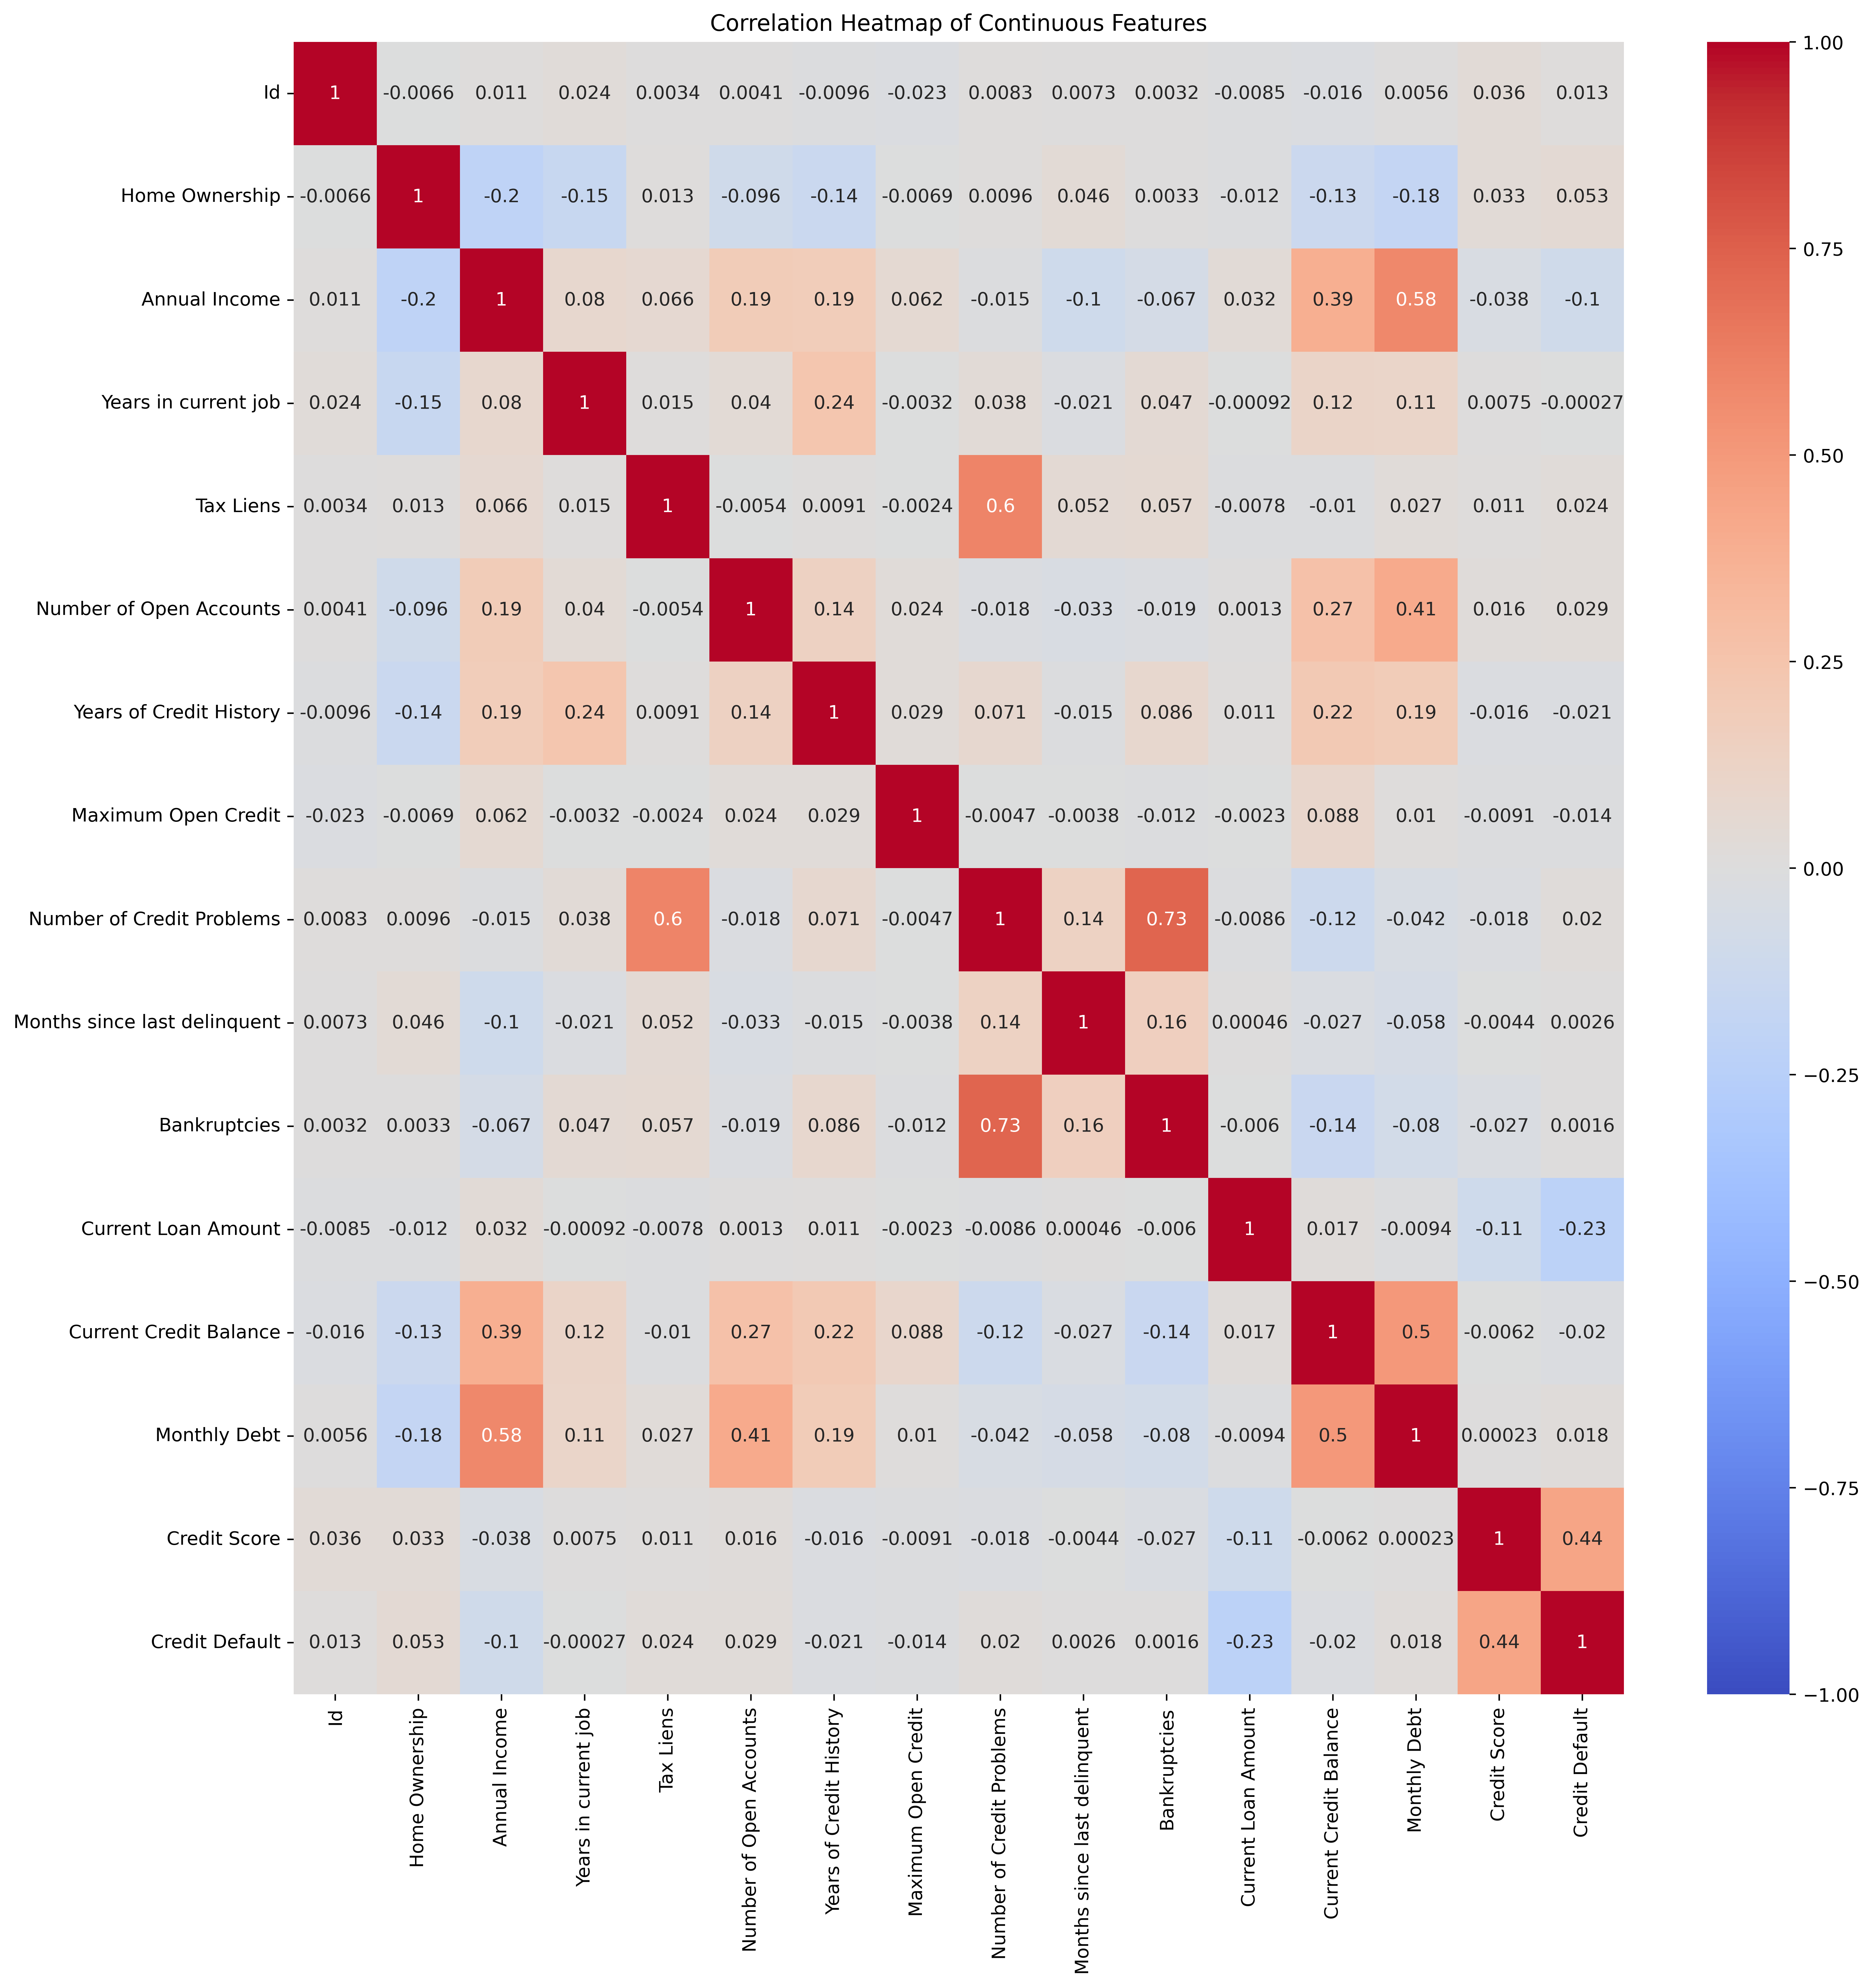

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:\desktop\python训练\data.csv")
# print(data.head())

# print(data["Home Ownership"].value_counts())
# print(data["Years in current job"].value_counts())

mapping = {
    "Years in current job":{
        "10+ years":10,
        "2 years":2,
        "3 years":3,
        "<1 years":0,
        "5 years":5,
        "1 years":1,
        "4 years":4,
        "6 years":6,
        "7 years":7,
        "8 years":8,
        "9years":9
    },
    "Home Ownership":{
        "Home Mortgage":0,
        "Rent":1,            
        "Own Home":2,          
        "Have Mortgage":3      
    }
}

data["Home Ownership"] = data["Home Ownership"].map(mapping["Home Ownership"])
data["Years in current job"] = data["Years in current job"].map(mapping["Years in current job"])

print(data["Home Ownership"].value_counts())
print(data["Years in current job"].value_counts())

continuous_feature = []
for i in data.columns.tolist():
    if data[i].dtype != "object":
        continuous_feature.append(i)

# print(continuous_feature)
# print(len(continuous_feature))

cor = data[continuous_feature].corr()

plt.rcParams['figure.dpi'] = 400
plt.figure(figsize=(16,16))
sns.heatmap(cor,annot= True,cmap='coolwarm',vmin = -1,vmax=1)
# sns.heatmap()：seaborn 的热力图函数，核心参数：
# correlation_matrix：要可视化的矩阵（这里是相关系数矩阵）。
# annot=True：在热力图单元格中标注具体的相关系数数值，方便读取。
# cmap='coolwarm'：颜色映射方案。蓝色→负相关（靠近 -1），红色→正相关（靠近 1），中间色→接近 0 的相关性。
# vmin=-1, vmax=1：限制颜色映射的取值范围（因 Pearson 相关系数范围是 [-1, 1]），确保颜色与相关系数的对应关系准确。
plt.title('Correlation Heatmap of Continuous Features')
plt.show()